In [1]:
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Lambda
from torch import flatten

/opt/miniconda3/envs/flowerpr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
def filter_chars(dataset_dict):
    def keep_a_to_j(example):
        return example["character"] in [c for c in range(36, 46)]
    filtered = dataset_dict.filter(keep_a_to_j)
    return filtered

In [21]:
num_partitions = 10

partitioner = IidPartitioner(num_partitions=num_partitions)
FDS = FederatedDataset(
    dataset="flwrlabs/femnist",
    partitioners={"train": partitioner},
    preprocessor=filter_chars
)


In [33]:
a = FDS.load_partition(9)

In [34]:
min(a["character"])

36

In [31]:
len(a)

8438

In [19]:
[c for c in range(36, 45)]

[36, 37, 38, 39, 40, 41, 42, 43, 44]

In [32]:
8438 * 10

84380

In [36]:
a[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'writer_id': 'f0585_26',
 'hsf_id': 1,
 'character': 44}

In [12]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

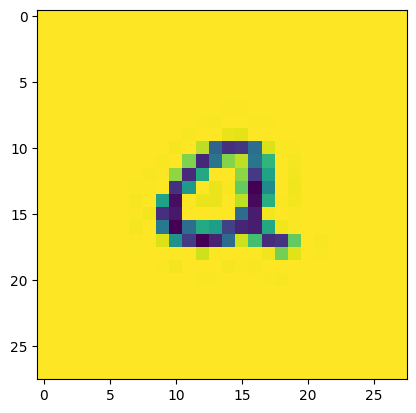

In [ ]:
imshow(np.asarray(a[]['image']))

# daas

In [1]:
"""fedprox: A Flower Baseline."""

import numpy as np
from datasets import DatasetDict, load_dataset
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import DistributionPartitioner, IidPartitioner
from flwr_datasets.preprocessor import Preprocessor
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Normalize, ToTensor

class FEMNISTFilter(Preprocessor):
    """A Preprocessor class that filter the FEMNIST data.

    It filters data with label 0 to 9 (lower case letters 'a'-'j')
    """

    def __call__(self, dataset: DatasetDict) -> DatasetDict:
        """."""
        allowed_labels = list(range(10))  # mapping to 'a'-'j'
        filtered_dataset = dataset.filter(
            lambda example: example["character"] in allowed_labels
        )
        return filtered_dataset

/opt/miniconda3/envs/flowerpr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
num_partitions = 200
num_unique_labels_per_partition = 5
num_unique_labels = 10
preassigned_num_samples_per_label = 5


rng = np.random.default_rng(42)
distribution_array = rng.lognormal(
    4.0,
    1.0,
    (num_partitions * num_unique_labels_per_partition),
)
distribution_array = distribution_array.reshape(
    (num_unique_labels, -1)
)
label_key = "character"
partitioner = DistributionPartitioner(
    distribution_array=distribution_array,
    num_partitions=num_partitions,
    num_unique_labels_per_partition=num_unique_labels_per_partition,
    partition_by=label_key,  # target column `label` ("character" for FEMNIST)
    preassigned_num_samples_per_label=preassigned_num_samples_per_label,
)


In [36]:
FDS = FederatedDataset(
                dataset="flwrlabs/femnist",
                preprocessor=FEMNISTFilter(),
                partitioners={"train": partitioner}
                  # Add the Preprocessor class for FEMNIST
            )

In [37]:
b = FDS.load_partition(0)

In [38]:
max(b["character"])

4

In [39]:
len(b)

2490

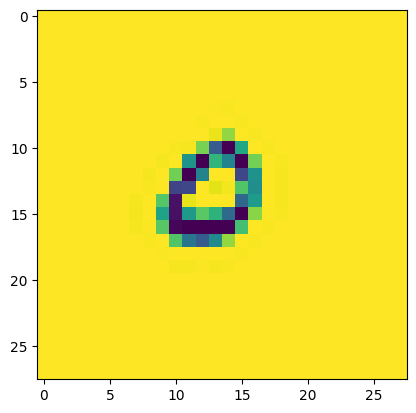

In [44]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

imshow(np.asarray(b[2]['image']))